In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importing the dataset

data = pd.read_csv('vehicles.csv')  # Carregando dataset

In [3]:
# Copying my dataset to another

data2 = data.copy(deep=True) # Copiando o dataset

In [4]:
# Analysing Columns

data2.columns  

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [5]:
# Shape of the dataset

data2.shape

(426880, 26)

In [6]:
# See the mean, variance, etc

data2.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [7]:
# Drop duplicates

data2.drop_duplicates(inplace = True)

In [8]:
# See which colunm has null values. False means that has no null value
# We'll try to remove the nullvalues of all features

data2.isnull().any()

id              False
url             False
region          False
region_url      False
price           False
year             True
manufacturer     True
model            True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
VIN              True
drive            True
size             True
type             True
paint_color      True
image_url        True
description      True
county           True
state           False
lat              True
long             True
posting_date     True
dtype: bool

In [9]:
data2.shape

(426880, 26)

In [10]:
# Seeing the 50 first inputs of description, the words are in differente cases

data2.description.head(50)

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                                                   NaN
6                                                   NaN
7                                                   NaN
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  NaN
13                                                  NaN
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              

In [11]:
# All letters of description in lowercase

data2.description.astype('str').apply(lambda x: x.lower()).inplace = True  

In [13]:
# Creating a new colunm which is the len of the text

data2['text_len'] = data2.description.apply(lambda x: len(str(x)))   

In [14]:
# Seeing which text_len has size greater than 1

(data2['text_len'].value_counts() > 1).sum()   

12084

<AxesSubplot:>

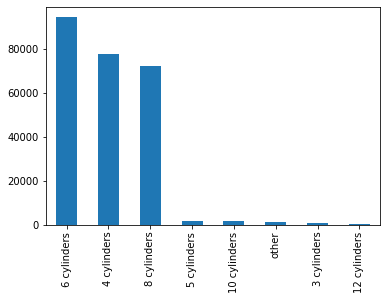

In [15]:
# Plotting the cylinders values

data2.cylinders.value_counts().plot(kind='bar')

In [16]:
# Cylinders type

data2.cylinders.dtype

dtype('O')

In [17]:
# Counting values from cylinders

data2.cylinders.value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [18]:
# Adjusting strings to float values only. Replace every string 'cylinders' for "" and strip the spaces

data2.cylinders = data2.cylinders.apply(lambda x: str(x).replace('cylinders', "").strip())  

In [19]:
# Now we just have float values!

data2.cylinders.value_counts()  

nan      177678
6         94169
4         77642
8         72062
5          1712
10         1455
other      1298
3           655
12          209
Name: cylinders, dtype: int64

In [20]:
# We still have nan values, so we'll drop them.


data2.cylinders = pd.to_numeric(data2.cylinders, errors = 'coerce') 

In [21]:
# Finally we have just float values

data2.cylinders.value_counts()

6.0     94169
4.0     77642
8.0     72062
5.0      1712
10.0     1455
3.0       655
12.0      209
Name: cylinders, dtype: int64

<AxesSubplot:>

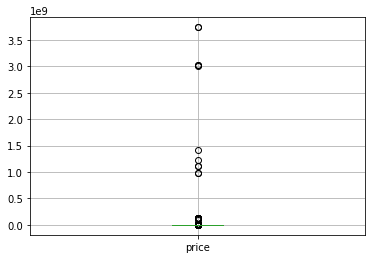

In [22]:
# We can see that has a lot of outliers on price feature

data2.boxplot('price') 

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

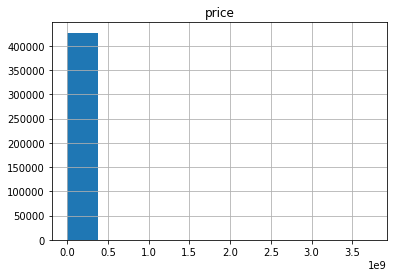

In [23]:
# We can see the outliers on the graph

data2.hist('price')

In [24]:
# We'll remove the outliers now on Odomoter and Price


data2_outliers = data2[(data2.price < data2.price.quantile(.995)) & (data2.price > data2.price.quantile(.005)) & (data2.price != 0) & (data2.odometer != 0)]  
data2_outliers = data2_outliers[(data2_outliers.odometer < data2_outliers.odometer.quantile(.995)) & (data2_outliers.odometer > data2_outliers.odometer.quantile(.005))]

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

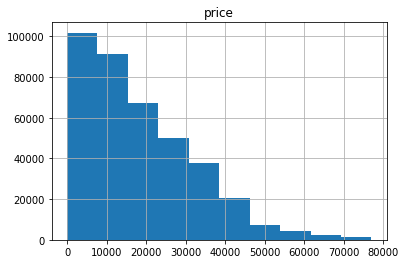

In [25]:
# Now we have almost a normal distribution on price

data2_outliers[['price']].hist()

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

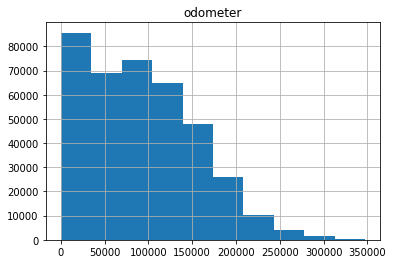

In [26]:
# Seeing odometer plot

data2_outliers[['odometer']].hist()

array([[<AxesSubplot:title={'center':'text_len'}>]], dtype=object)

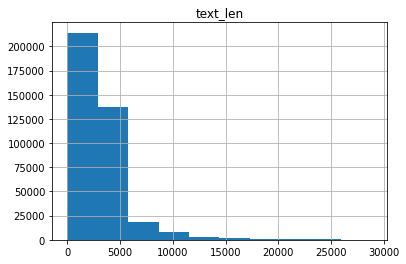

In [27]:
# We can see the plot of text_len

data2_outliers[['text_len']].hist()

In [28]:
# Now we'll check the percentage of null values each features has before we took the outliers out

data2.isnull().sum()/ data2.shape[0]

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.419265
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
text_len        0.000000
dtype: float64

In [29]:
# After we removed we can see that the null values on odomoter went to 0

data2_outliers.isnull().sum()/ data2_outliers.shape[0]  

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002673
manufacturer    0.037691
model           0.011024
condition       0.381215
cylinders       0.406930
fuel            0.005893
odometer        0.000000
title_status    0.018443
transmission    0.003779
VIN             0.382921
drive           0.302921
size            0.716753
type            0.215013
paint_color     0.293294
image_url       0.000000
description     0.000005
county          1.000000
state           0.000000
lat             0.008608
long            0.008608
posting_date    0.000000
text_len        0.000000
dtype: float64

In [30]:
# We'll remove the null values on features that has low percentages of null values.

data2_outliers.dropna(subset=['year','manufacturer','fuel','title_status','transmission','description','lat','long','model'],inplace=True) 

In [31]:
# Now we have less null values

data2_outliers.isnull().sum()/data2_outliers.shape[0]    

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.000000
manufacturer    0.000000
model           0.000000
condition       0.376199
cylinders       0.411326
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
VIN             0.379992
drive           0.296823
size            0.715610
type            0.213549
paint_color     0.282466
image_url       0.000000
description     0.000000
county          1.000000
state           0.000000
lat             0.000000
long            0.000000
posting_date    0.000000
text_len        0.000000
dtype: float64

In [32]:
# Let's fill the null values of cylinders with it's median

data2_outliers.cylinders.fillna(data2_outliers.cylinders.median(), inplace = True) 
data2_outliers.isnull().sum()/data2_outliers.shape[0]    

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.000000
manufacturer    0.000000
model           0.000000
condition       0.376199
cylinders       0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
VIN             0.379992
drive           0.296823
size            0.715610
type            0.213549
paint_color     0.282466
image_url       0.000000
description     0.000000
county          1.000000
state           0.000000
lat             0.000000
long            0.000000
posting_date    0.000000
text_len        0.000000
dtype: float64

In [33]:
# For the categorical, object features, we'll fill the null values with 'n/a'

data2_outliers[['condition','VIN','drive','type','paint_color']] = data2_outliers[['condition','VIN','drive','type','paint_color']].fillna('n/a') 
data2_outliers.isnull().sum()/data2_outliers.shape[0]  

id              0.00000
url             0.00000
region          0.00000
region_url      0.00000
price           0.00000
year            0.00000
manufacturer    0.00000
model           0.00000
condition       0.00000
cylinders       0.00000
fuel            0.00000
odometer        0.00000
title_status    0.00000
transmission    0.00000
VIN             0.00000
drive           0.00000
size            0.71561
type            0.00000
paint_color     0.00000
image_url       0.00000
description     0.00000
county          1.00000
state           0.00000
lat             0.00000
long            0.00000
posting_date    0.00000
text_len        0.00000
dtype: float64

In [34]:
# Let's take a closer lok on VIN

data2.VIN.head(50) 

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
5                   NaN
6                   NaN
7                   NaN
8                   NaN
9                   NaN
10                  NaN
11                  NaN
12                  NaN
13                  NaN
14                  NaN
15                  NaN
16                  NaN
17                  NaN
18                  NaN
19                  NaN
20                  NaN
21                  NaN
22                  NaN
23                  NaN
24                  NaN
25                  NaN
26                  NaN
27    3GTP1VEC4EG551563
28    1GCSCSE06AZ123805
29    3GCPWCED5LG130317
30    5TFRM5F17HX120972
31                  NaN
32    1GT220CG8CZ231238
33    1GCVKREH6GZ228691
34                  NaN
35    1GCHTCE37G1186784
36    1G1YR3DW3B5102190
37                  NaN
38    1C4BJWDG5HL705371
39    1GCNCNEH7HZ118773
40    1GCGTDE32G1341288
41    5TFTX4CN3E

In [37]:
# It makes more sense than having a lot of numbers and letter, to know if a car has identification or not

data2_outliers.VIN= data2_outliers.VIN.apply(lambda x: 'has_vin' if x != 'n/a' else 'no_vin') 

In [38]:
# Drop some features I thought wouldn't help the model a lot. Special note for size which has too many null values

data_final = data2_outliers.drop(['url','region','region_url','size','county','posting_date','lat','long','image_url','state'], axis = 1) 

In [39]:
# Let's create a new feature 'age' instead of taking the year input

data_final['age'] = 2022 - data_final.year   
data_final.age.head(20)

27     8.0
28    12.0
29     2.0
30     5.0
31     9.0
32    10.0
33     6.0
34     3.0
35     6.0
36    11.0
37    30.0
38     5.0
39     5.0
40     6.0
41     8.0
42     6.0
43     8.0
44     3.0
45     4.0
47     4.0
Name: age, dtype: float64

<AxesSubplot:>

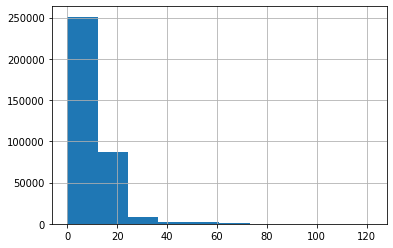

In [40]:
# Plotting age 

data_final.age.hist()

<AxesSubplot:>

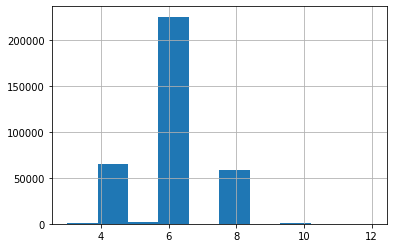

In [41]:
# Cylinders plot

data_final.cylinders.hist()

In [42]:
# We can see the types of values and the null values for each feature

data_final.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353005 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            353005 non-null  int64  
 1   price         353005 non-null  int64  
 2   year          353005 non-null  float64
 3   manufacturer  353005 non-null  object 
 4   model         353005 non-null  object 
 5   condition     353005 non-null  object 
 6   cylinders     353005 non-null  float64
 7   fuel          353005 non-null  object 
 8   odometer      353005 non-null  float64
 9   title_status  353005 non-null  object 
 10  transmission  353005 non-null  object 
 11  VIN           353005 non-null  object 
 12  drive         353005 non-null  object 
 13  type          353005 non-null  object 
 14  paint_color   353005 non-null  object 
 15  description   353005 non-null  object 
 16  text_len      353005 non-null  int64  
 17  age           353005 non-null  float64
dtypes: 

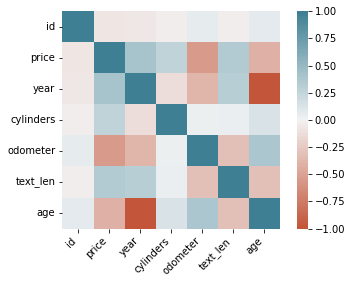

In [43]:
# Know we can look at the correlation table and see how each feature correlates with the others

numeric = data_final._get_numeric_data()    

corrdata = numeric

corr = corrdata.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

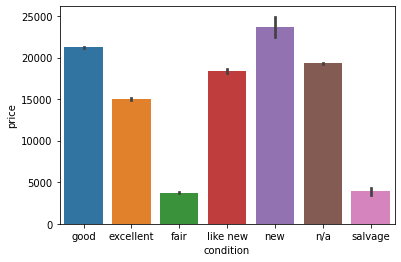

In [44]:
# Plotting a few features to see how they behave compared to price

ax = sns.barplot(x="condition", y="price", data=data_final)  

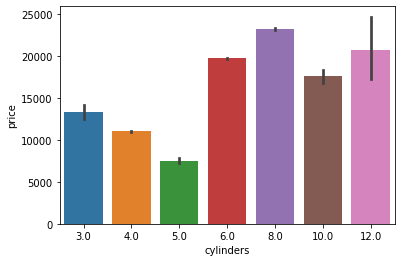

In [45]:
# Plotting Cylinders x Price

ax = sns.barplot(x="cylinders", y="price", data=data_final)

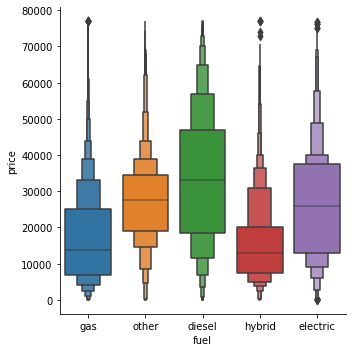

In [47]:
# Plotting Fuel x Price

sns.catplot(x="fuel", y="price", kind="boxen", data=data_final) 

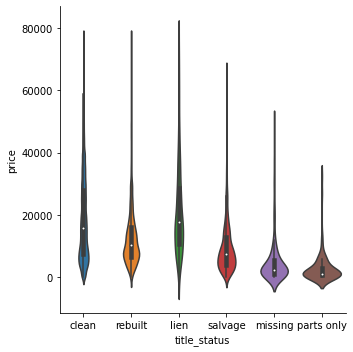

In [48]:
# Plotting Actual Status x Price

sns.catplot(x="title_status", y="price",kind="violin", data=data_final) 

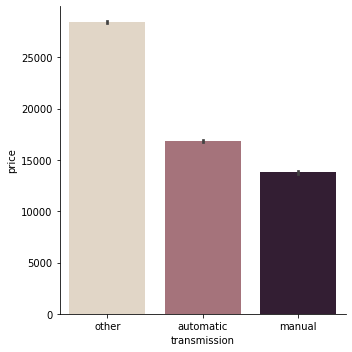

In [49]:
# Plotting Transmission x Price

sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=data_final)  

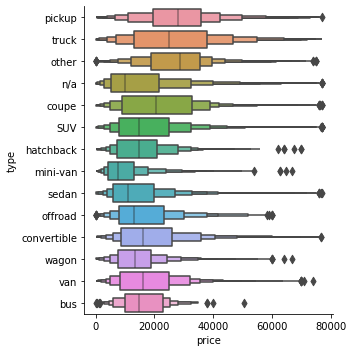

In [50]:
# Plotting Type of Vehicle x Price

sns.catplot(y="type", x="price",kind="boxen", data=data_final);  

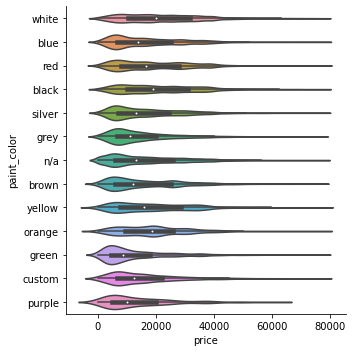

In [51]:
# Plotting Paint Colors x Price

sns.catplot(y="paint_color", x="price",kind="violin", data=data_final);  

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSEE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [53]:
# We're going to normalize odometer and age

scale = StandardScaler() 
data_final[['odometer','age']] = scale.fit_transform(data_final[['odometer','age']]) 

In [62]:
# We can see that they are between a certain range

data_final[['odometer','age']].info

<bound method DataFrame.info of         odometer       age
27     -0.561701 -0.295216
28     -0.347469  0.171837
29     -1.185802 -0.995795
30     -0.832172 -0.645505
31      0.566568 -0.178453
...          ...       ...
426875 -0.975434 -0.879032
426876 -1.300614 -0.995795
426877 -1.427083 -0.995795
426878 -1.009470 -0.762269
426879 -1.128549 -0.879032

[353005 rows x 2 columns]>

In [55]:
# Define X and y sets with our parameters

X = pd.get_dummies(data_final[['id','odometer','condition','fuel','transmission','paint_color','VIN','drive','type','age']]) 
y = data_final.price.values 

In [56]:
# Defining train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [63]:
# Testing RandomForest

regressor = RandomForestRegressor(n_estimators=30, random_state=2) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [64]:
#Metrics

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 3016.16
Mean Squared Error: 31669794.14
Root Mean Squared Error: 5627.59
83.40161148625648


In [59]:
# Testing Linear Regression

reg = LinearRegression().fit(X_train, y_train) 
y_pred = reg.predict(X_test)

In [60]:
#Metrics

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(reg.score(X_test,y_test)*100)

Mean Absolute Error: 6379.7
Mean Squared Error: 80250538.62
Root Mean Squared Error: 8958.27
57.94006072700976


In [129]:
#Importing XGBoost and testing XGBoost

import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 55, alpha = 10, n_estimators = 25)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[15:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [130]:
# Metrics

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(xg_reg.score(X_test,y_test)*100)

Mean Absolute Error: 6379.7
Mean Squared Error: 80250538.62
Root Mean Squared Error: 8958.27
71.16681937105102
